In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skimage.io import imread, imread_collection, imshow, imshow_collection
from scipy.signal import convolve2d
from scipy.fft import fft2, fftshift
from skimage.filters import threshold_otsu
from skimage.transform import resize, rotate

In [4]:
# pip install -U scikit-image

In [5]:
cat_image = imread("data/domestic-cat/dc (17).jpg")

In [6]:
cat_image

array([[[ 64,  88,  90],
        [ 59,  83,  85],
        [ 51,  75,  77],
        ...,
        [ 39,  41,  28],
        [ 39,  41,  27],
        [ 39,  41,  27]],

       [[ 58,  82,  84],
        [ 55,  79,  81],
        [ 49,  73,  75],
        ...,
        [ 39,  41,  28],
        [ 39,  41,  27],
        [ 39,  41,  27]],

       [[ 50,  74,  76],
        [ 49,  73,  75],
        [ 46,  70,  72],
        ...,
        [ 37,  39,  26],
        [ 37,  39,  25],
        [ 37,  39,  25]],

       ...,

       [[118, 169,  64],
        [117, 168,  63],
        [124, 172,  72],
        ...,
        [162, 202,  87],
        [177, 216,  99],
        [190, 227, 111]],

       [[131, 182,  77],
        [125, 176,  71],
        [125, 173,  73],
        ...,
        [169, 208,  93],
        [184, 221, 105],
        [199, 234, 118]],

       [[139, 190,  85],
        [132, 183,  78],
        [129, 177,  77],
        ...,
        [174, 211,  97],
        [190, 225, 109],
        [203, 236, 121]]

In [7]:
cat_image.shape

(183, 275, 3)

In [8]:
all_domestic_cats = imread_collection("data/domestic-cat/*")

In [9]:
list(all_domestic_cats)

[array([[[185, 188, 193],
         [183, 186, 191],
         [179, 182, 187],
         ...,
         [107, 161,  83],
         [104, 163,  83],
         [104, 163,  83]],
 
        [[186, 189, 194],
         [184, 187, 192],
         [181, 184, 189],
         ...,
         [103, 157,  79],
         [100, 159,  79],
         [100, 159,  79]],
 
        [[189, 192, 197],
         [187, 190, 195],
         [184, 187, 192],
         ...,
         [ 98, 152,  74],
         [ 96, 153,  74],
         [ 96, 153,  74]],
 
        ...,
 
        [[ 55, 145,  55],
         [ 75, 164,  72],
         [ 73, 156,  66],
         ...,
         [101, 175,  96],
         [ 98, 177,  98],
         [ 98, 176, 100]],
 
        [[ 68, 158,  68],
         [ 85, 174,  82],
         [ 80, 163,  73],
         ...,
         [ 87, 171,  86],
         [ 83, 171,  87],
         [ 83, 170,  89]],
 
        [[ 78, 168,  78],
         [ 93, 182,  90],
         [ 85, 168,  78],
         ...,
         [ 85, 173,  86],
  

In [10]:
len(all_domestic_cats)

64

In [11]:
all_domestic_cats[16]

array([[[ 64,  88,  90],
        [ 59,  83,  85],
        [ 51,  75,  77],
        ...,
        [ 39,  41,  28],
        [ 39,  41,  27],
        [ 39,  41,  27]],

       [[ 58,  82,  84],
        [ 55,  79,  81],
        [ 49,  73,  75],
        ...,
        [ 39,  41,  28],
        [ 39,  41,  27],
        [ 39,  41,  27]],

       [[ 50,  74,  76],
        [ 49,  73,  75],
        [ 46,  70,  72],
        ...,
        [ 37,  39,  26],
        [ 37,  39,  25],
        [ 37,  39,  25]],

       ...,

       [[118, 169,  64],
        [117, 168,  63],
        [124, 172,  72],
        ...,
        [162, 202,  87],
        [177, 216,  99],
        [190, 227, 111]],

       [[131, 182,  77],
        [125, 176,  71],
        [125, 173,  73],
        ...,
        [169, 208,  93],
        [184, 221, 105],
        [199, 234, 118]],

       [[139, 190,  85],
        [132, 183,  78],
        [129, 177,  77],
        ...,
        [174, 211,  97],
        [190, 225, 109],
        [203, 236, 121]]

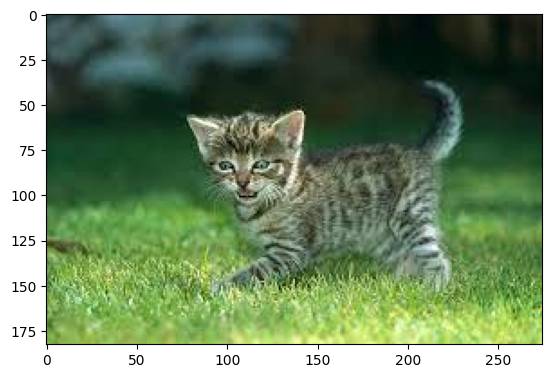

In [12]:
plt.imshow(cat_image)

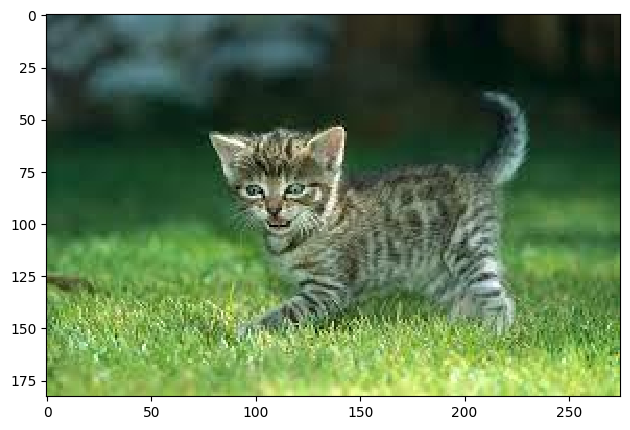

In [13]:
imshow(cat_image)

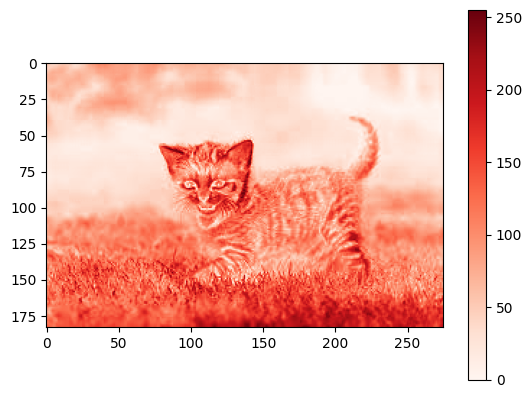

In [14]:
plt.imshow(cat_image[:,:,0], cmap="Reds")
plt.colorbar()

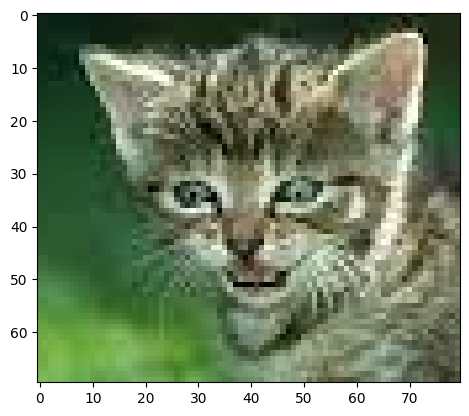

In [15]:
plt.imshow(cat_image[50:120, 70:150])

In [16]:
cat_image.dtype

dtype('uint8')

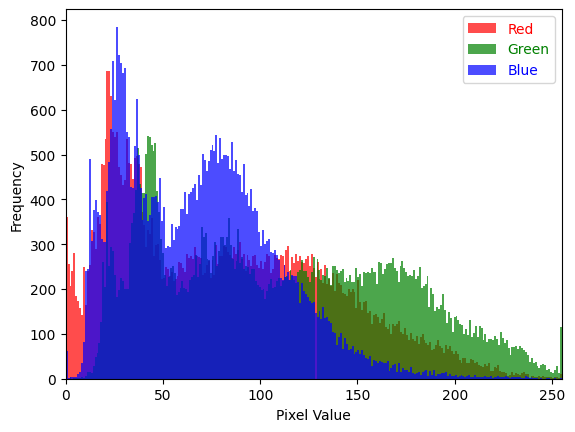

In [17]:
red = plt.hist(cat_image[:,:,0].ravel(), bins=255, color="red", alpha=0.7)
green = plt.hist(cat_image[:,:,1].ravel(), bins=255, color="green", alpha=0.7)
blue = plt.hist(cat_image[:,:,2].ravel(), bins=255, color="blue", alpha=0.7)


plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.legend(["Red", "Green", "Blue"], labelcolor=["red", "green", "blue"])
plt.xlim(0, 255)
plt.show()

In [18]:
cat_image_masked = cat_image.copy()

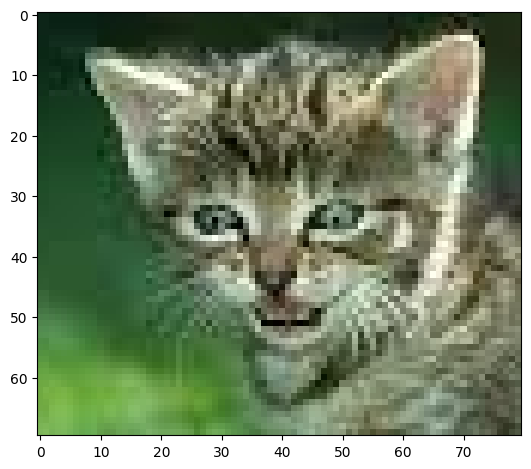

In [19]:
imshow(cat_image_masked[50:120, 70:150])

In [20]:

cat_image_masked[50:120, 70:150] = 0

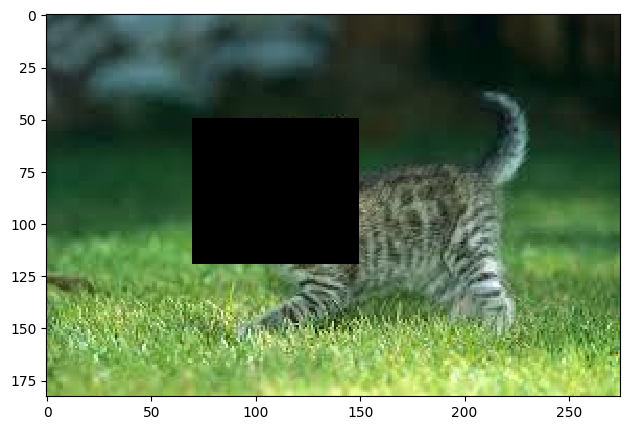

In [21]:
imshow(cat_image_masked)

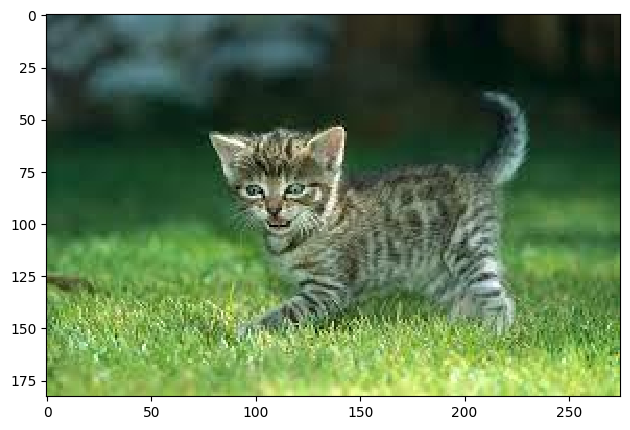

In [22]:
cat_image_normalized = cat_image/255
imshow(cat_image_normalized)

In [23]:
conv_filter = np.array([[1, 0, 1], [0, 1, 0], [1, 0, 1]])

In [26]:
result = convolve2d(cat_image[:, :, 0], conv_filter, mode="same") 

In [27]:
result.min(), result.max()

(0, 1196)

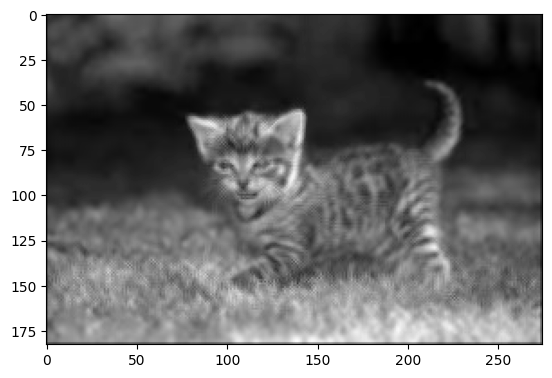

In [29]:
plt.imshow(result, cmap="gray")

In [30]:
cat_image_binary = cat_image.copy()

In [31]:
cat_image.mean()

86.89653253849976

In [34]:
cat_image_binary[cat_image_binary < cat_image.mean()] = 0
cat_image_binary[cat_image_binary >= cat_image.mean()] = 255

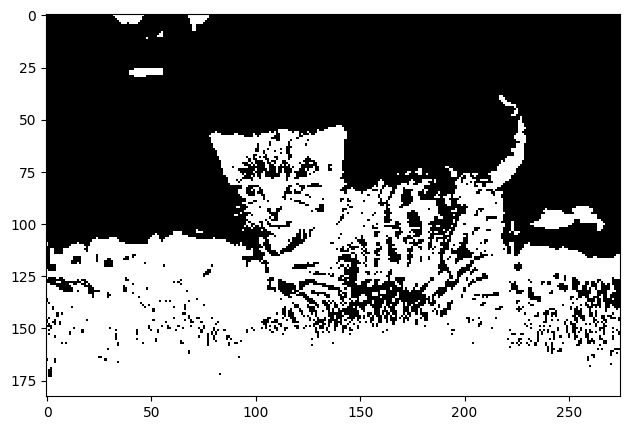

In [36]:
imshow(cat_image_binary[:, :, 0])

In [38]:
threshold_otsu(cat_image[:, :, 0])

88

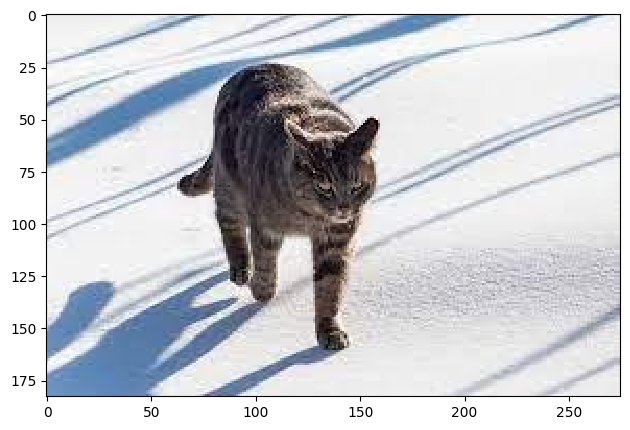

In [39]:
imshow(all_domestic_cats[57])

In [40]:
threshold_otsu(all_domestic_cats[57][:, :, 0])

157

In [41]:
cat_image_56_binary = all_domestic_cats[57].copy()[:, :, 0]

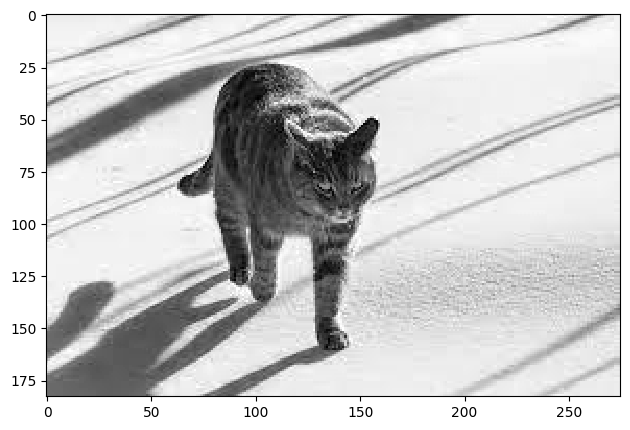

In [42]:
imshow(cat_image_56_binary)

In [43]:
cat_image_56_binary[cat_image_56_binary < threshold_otsu(all_domestic_cats[57][:, :, 0])] = 0
cat_image_56_binary[cat_image_56_binary >= threshold_otsu(all_domestic_cats[57][:, :, 0])] = 255

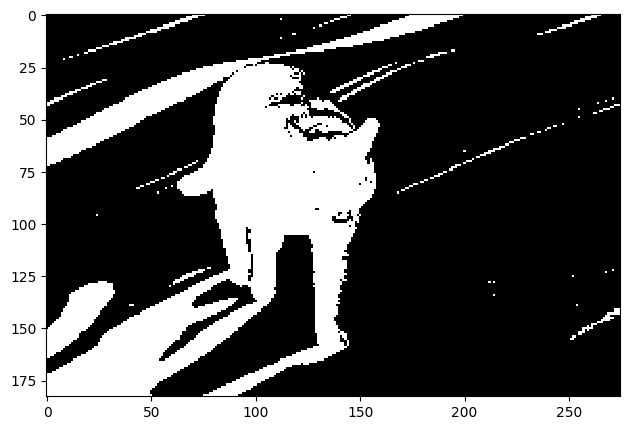

In [46]:
imshow(255 - cat_image_56_binary, cmap="gray")

In [55]:
result = 0.5 * all_domestic_cats[0].astype(int) + 0.5 * all_domestic_cats[1].astype(int)

In [56]:
result.dtype

dtype('float64')

In [57]:
result.min(), result.max()

(4.5, 249.5)

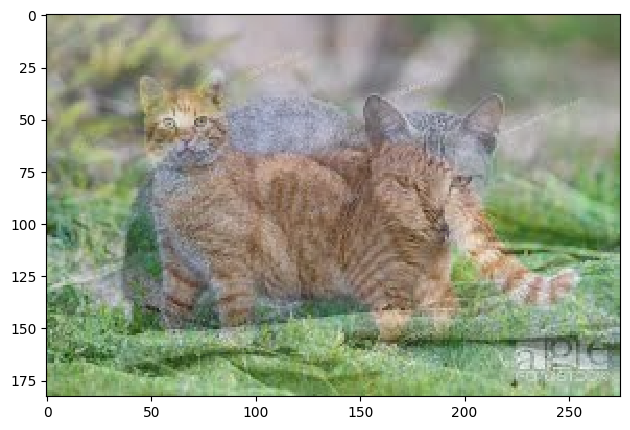

In [59]:
imshow(result.astype("uint8"))

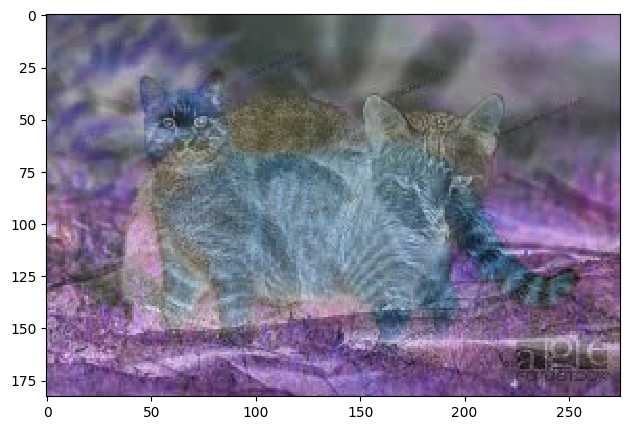

In [60]:
imshow(255 - result.astype("uint8"))


In [62]:
resize(cat_image, (500, 500)).shape

(500, 500, 3)

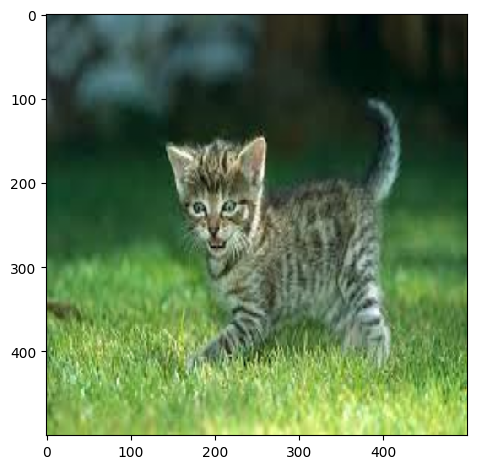

In [63]:
imshow(resize(cat_image, (500, 500)))

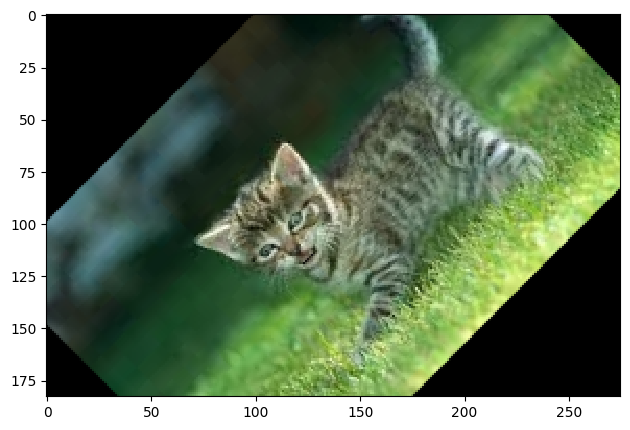

In [64]:
imshow(rotate(cat_image, 45))

In [67]:
fft2(cat_image[:, :, 0])

array([[ 4.09287000e+06      -0.j        ,
        -3.22509063e+05  -65060.01872097j,
         3.75724067e+03  +89763.12255072j, ...,
        -8.72622183e+04 +137634.73746289j,
         3.75724067e+03  -89763.12255072j,
        -3.22509063e+05  +65060.01872097j],
       [ 2.86694811e+05+1245416.93227679j,
         1.08023469e+05   -7247.57791062j,
        -1.41873132e+04 -230312.78506534j, ...,
         2.25017660e+04  -62236.6096925j ,
        -6.53107981e+04  +43845.41306445j,
         2.62074352e+05 +164463.67141768j],
       [ 2.85550153e+05 +475248.64309944j,
        -2.40554138e+05  -36712.58175304j,
        -1.97806100e+04  +53643.07757816j, ...,
        -8.78819118e+04  +12224.70359316j,
         1.76430582e+05  -14896.35146851j,
        -2.82820410e+04 -243809.67683568j],
       ...,
       [ 8.31333411e+04 -330023.8498096j ,
         1.82462348e+05  -15045.9682626j ,
        -5.67875389e+04  +67065.91822131j, ...,
        -5.80875412e+04  +10419.89366466j,
         3.48138943

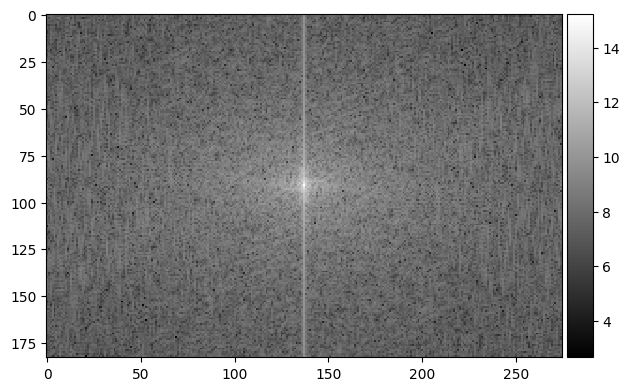

In [74]:
imshow(np.log(np.abs(fftshift(fft2(cat_image[:, :, 0])))), cmap="gray")